In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv('Data_folder\project_data_logistic.csv')

In [204]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [205]:
print(f'Number of Rows in the given data is:{df.shape[0]}')
print(f'Number of columns in the given data is: {df.shape[1]}')

Number of Rows in the given data is:396030
Number of columns in the given data is: 27


In [206]:
missing_values_per = (df.isna().sum()/df.shape[0])*100
missing_values_per

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [208]:

pd.set_option('display.max_columns', None)

In [209]:
df.describe(include="all")

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394275,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48817,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


Univariate Analysis

Since Target Variable is loan_status We need to evaluate that column


In [210]:

df.groupby(by='loan_status')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [211]:
Tag_vari = df["loan_status"].value_counts(normalize=True)*100
Tag_vari

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

From the above table we can say that 83.39% from the customers completed their loan and only 19.61% customers were charged off

Distribution of Loan Amount

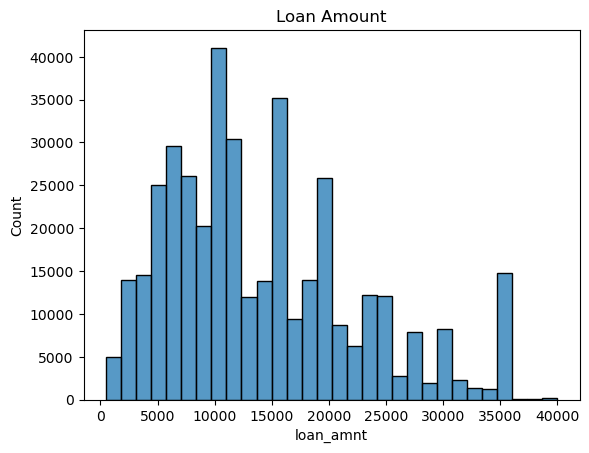

In [212]:
sns.histplot(df["loan_amnt"],bins=30)
plt.title("Loan Amount")
plt.show()

In [213]:
numeric_column = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies']

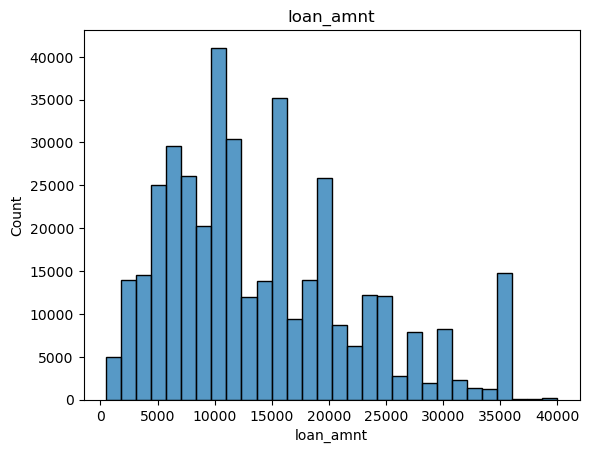

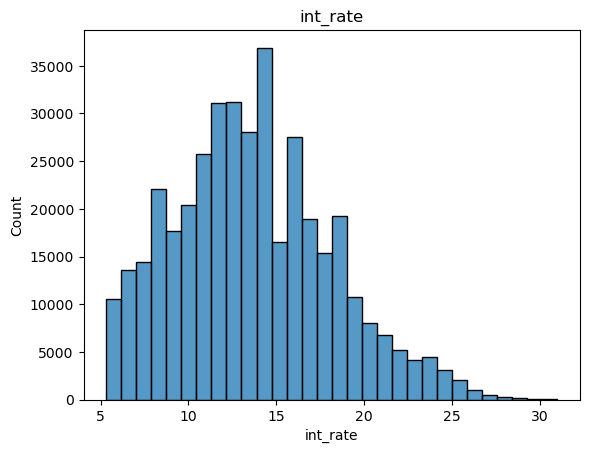

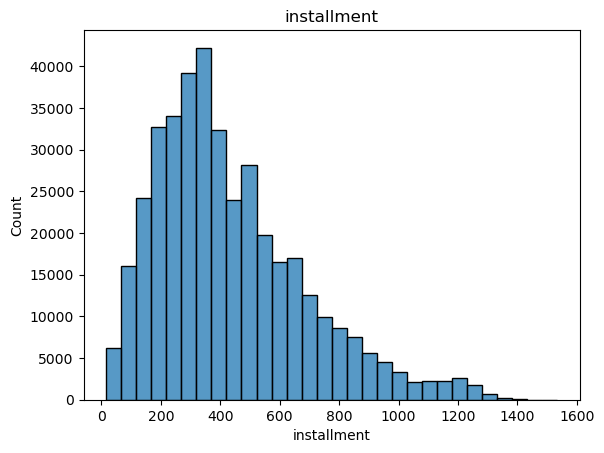

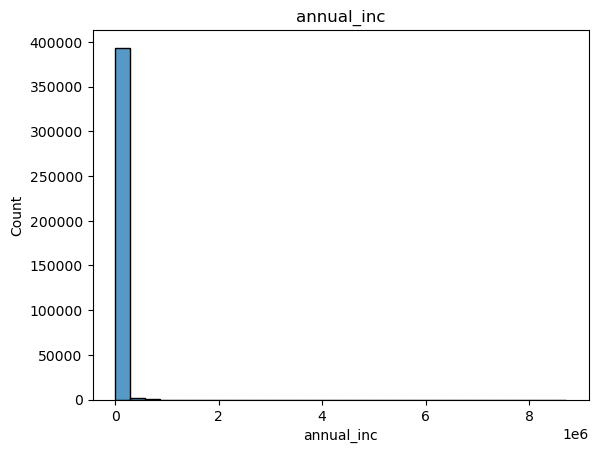

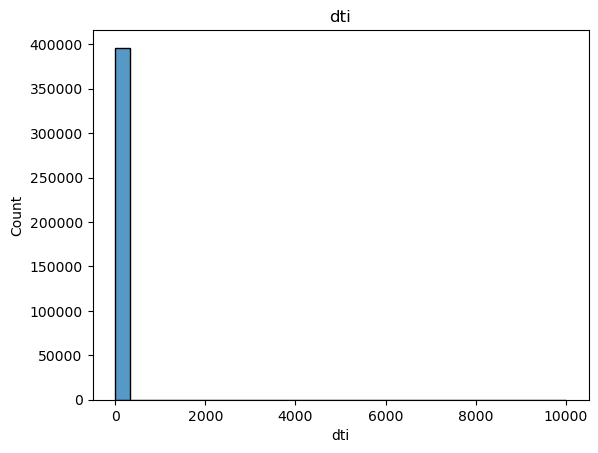

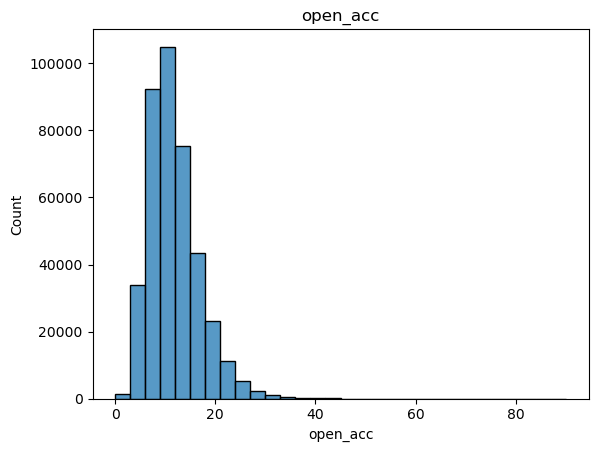

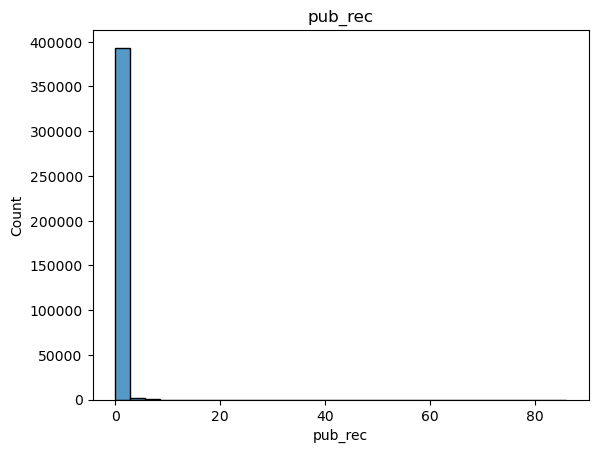

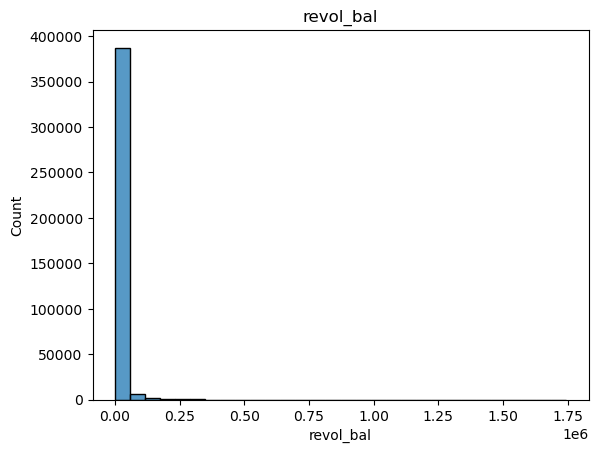

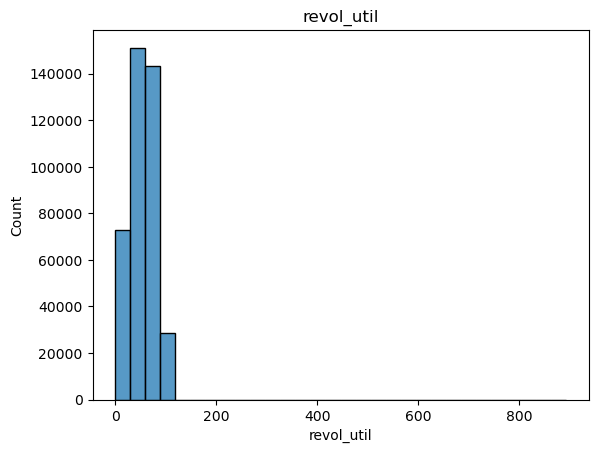

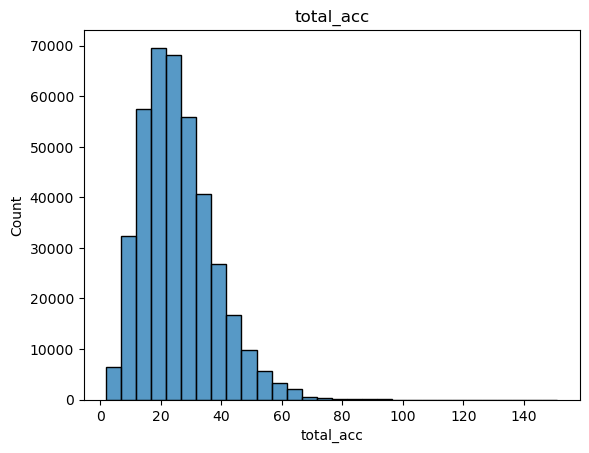

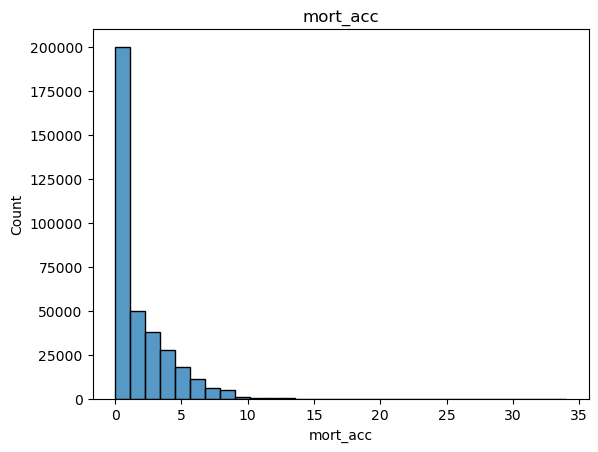

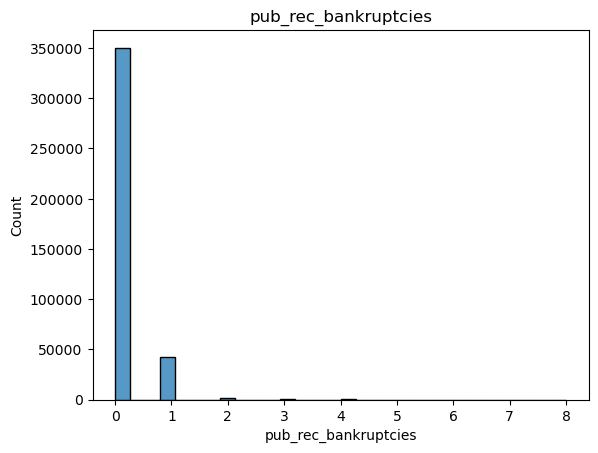

In [214]:
for i in numeric_column:
    sns.histplot(df[i],bins=30)
    plt.title(i)
    plt.show()

In [215]:
df[['term', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'pub_rec',
       'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies']]

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,pub_rec,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,0.0,w,INDIVIDUAL,0.0,0.0
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,0.0,f,INDIVIDUAL,3.0,0.0
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,0.0,f,INDIVIDUAL,0.0,0.0
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,0.0,f,INDIVIDUAL,0.0,0.0
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,0.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,0.0,w,INDIVIDUAL,0.0,0.0
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,0.0,f,INDIVIDUAL,1.0,0.0
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,0.0,f,INDIVIDUAL,0.0,0.0
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,0.0,f,INDIVIDUAL,5.0,0.0


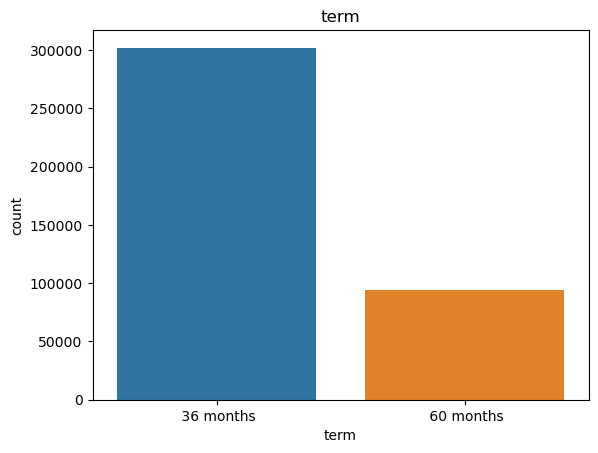

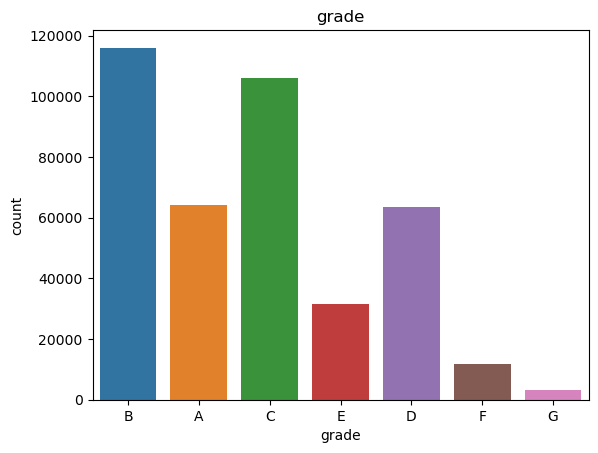

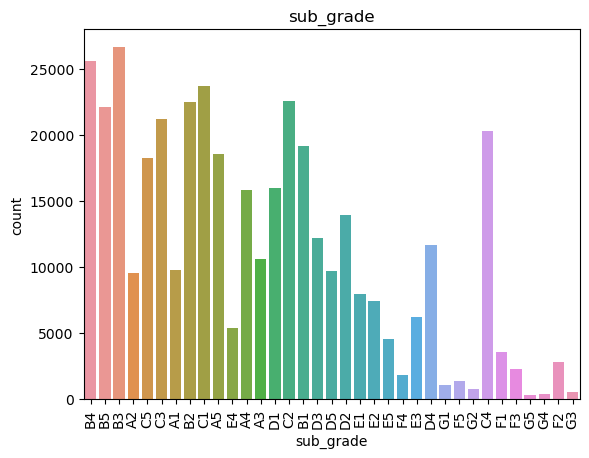

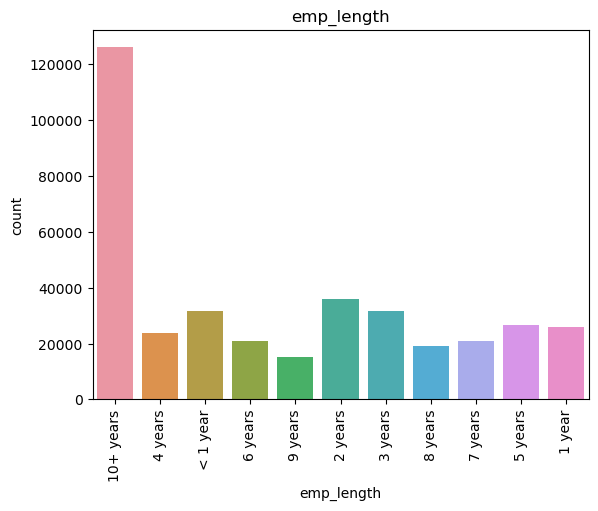

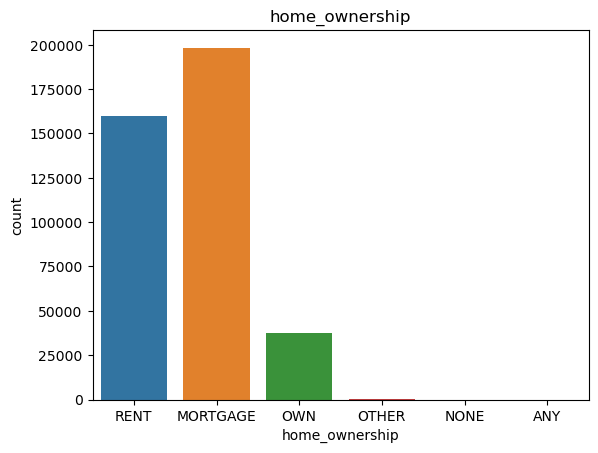

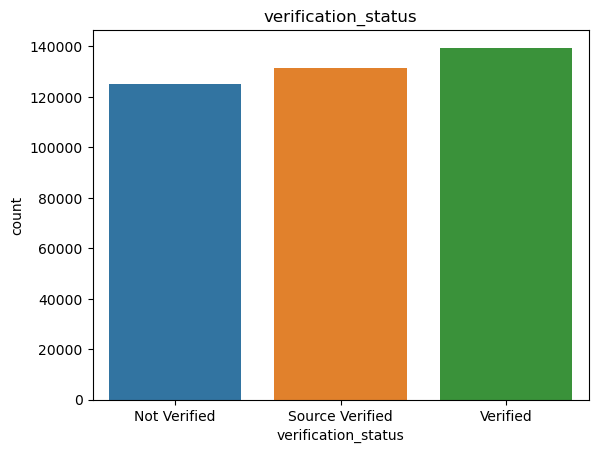

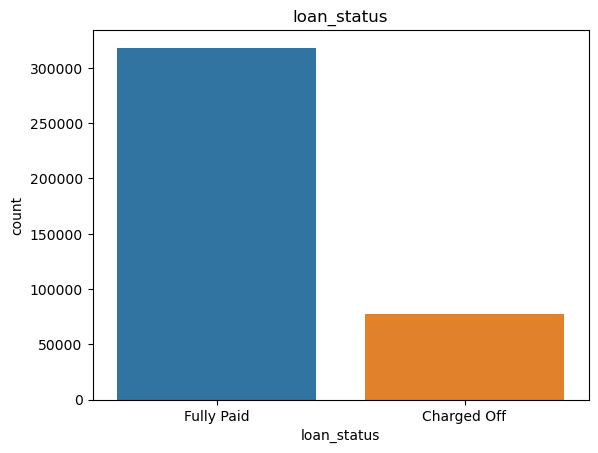

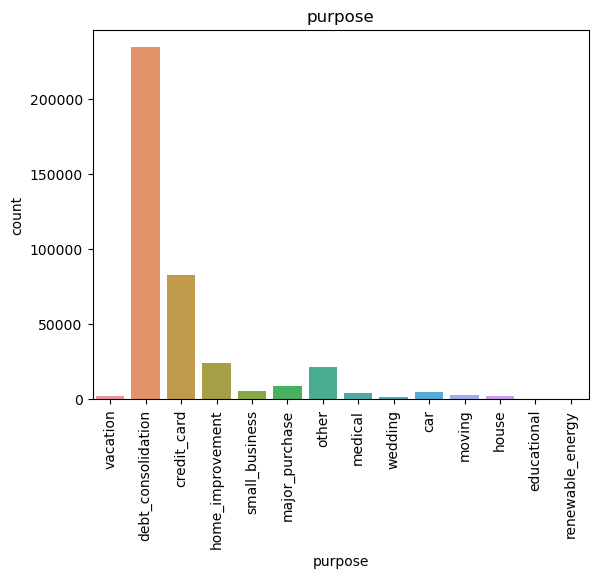

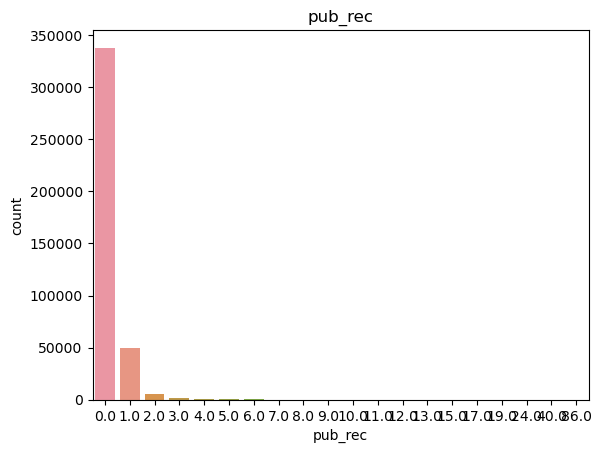

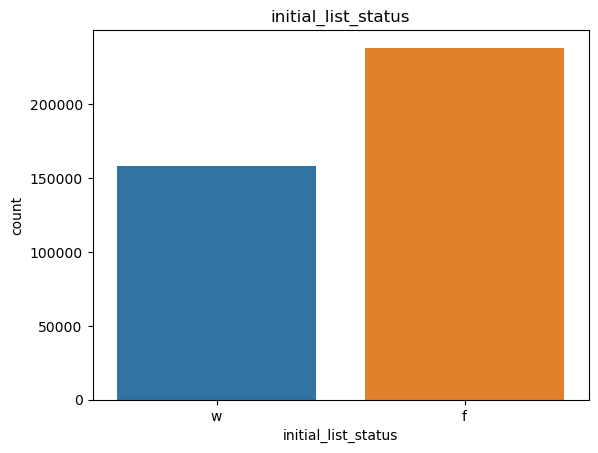

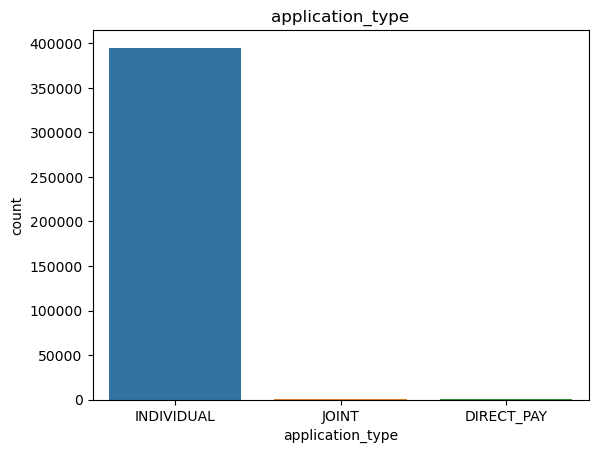

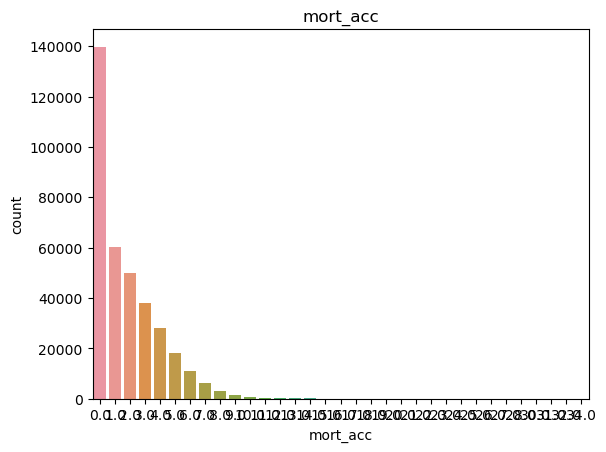

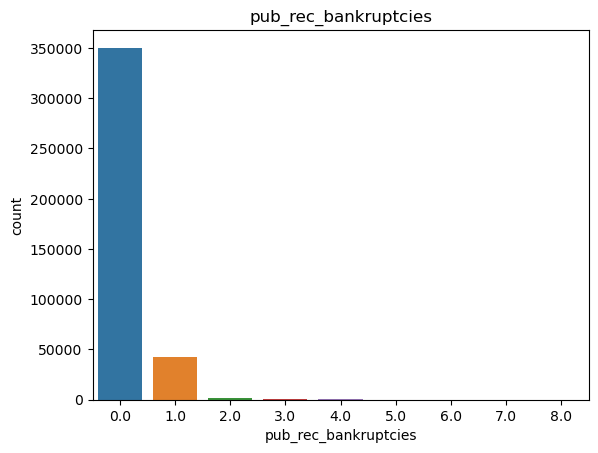

In [216]:
list_1 = ['term', 'grade', 'sub_grade','emp_length', 'home_ownership', 
       'verification_status', 'loan_status', 'purpose', 'pub_rec',
       'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies']
for i in list_1:
    sns.countplot(x=df[i])
    if i in [ "sub_grade","emp_length","purpose"]:
        plt.xticks(rotation = 90)
    plt.title(i)
    plt.show()

In [217]:
# ['term', 'grade', 'sub_grade','emp_length', 'home_ownership', 
#        'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'pub_rec',
#        'initial_list_status', 'application_type',
#        'mort_acc', 'pub_rec_bankruptcies']
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [218]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [219]:
df.loc[(df["home_ownership"] == "NONE" )|( df["home_ownership"] == "ANY"),"home_ownership"] 

9949      NONE
16970      ANY
48022     NONE
54698     NONE
66859     NONE
71826     NONE
84015     NONE
89376     NONE
94031      ANY
99298     NONE
113330    NONE
131506    NONE
146542    NONE
156252    NONE
164092    NONE
164820    NONE
174038    NONE
188699    NONE
189952    NONE
194811    NONE
211886    NONE
221921     ANY
234556    NONE
244934    NONE
273319    NONE
282860    NONE
314633    NONE
329010    NONE
352905    NONE
360708    NONE
367076    NONE
374515    NONE
394054    NONE
395612    NONE
Name: home_ownership, dtype: object

In [220]:
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [221]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [222]:
df["title"].value_counts()[:20]

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: title, dtype: int64

In [223]:
df['title']=df.title.str.lower()

In [224]:
df["title"].value_counts()[:20]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
Name: title, dtype: int64

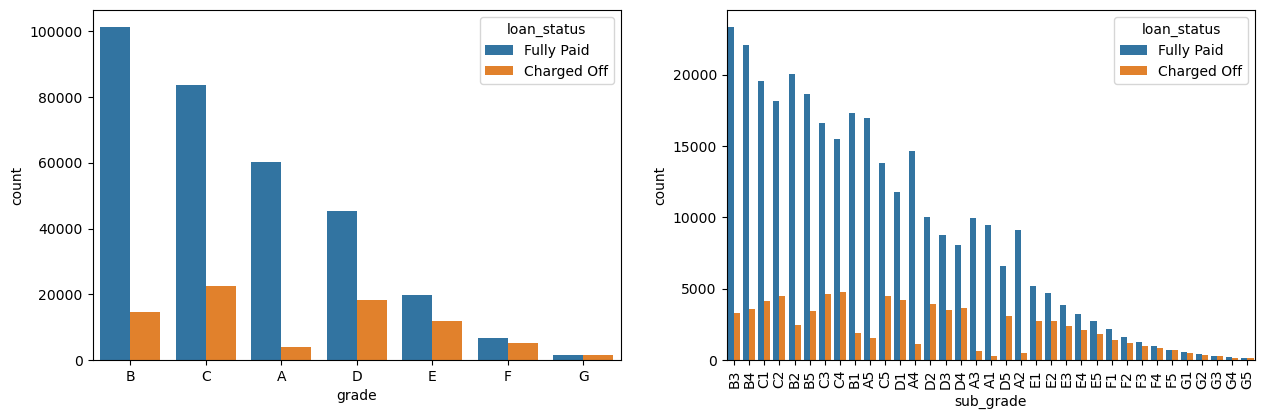

In [225]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = df["grade"].value_counts().index
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = df["sub_grade"].value_counts().index
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

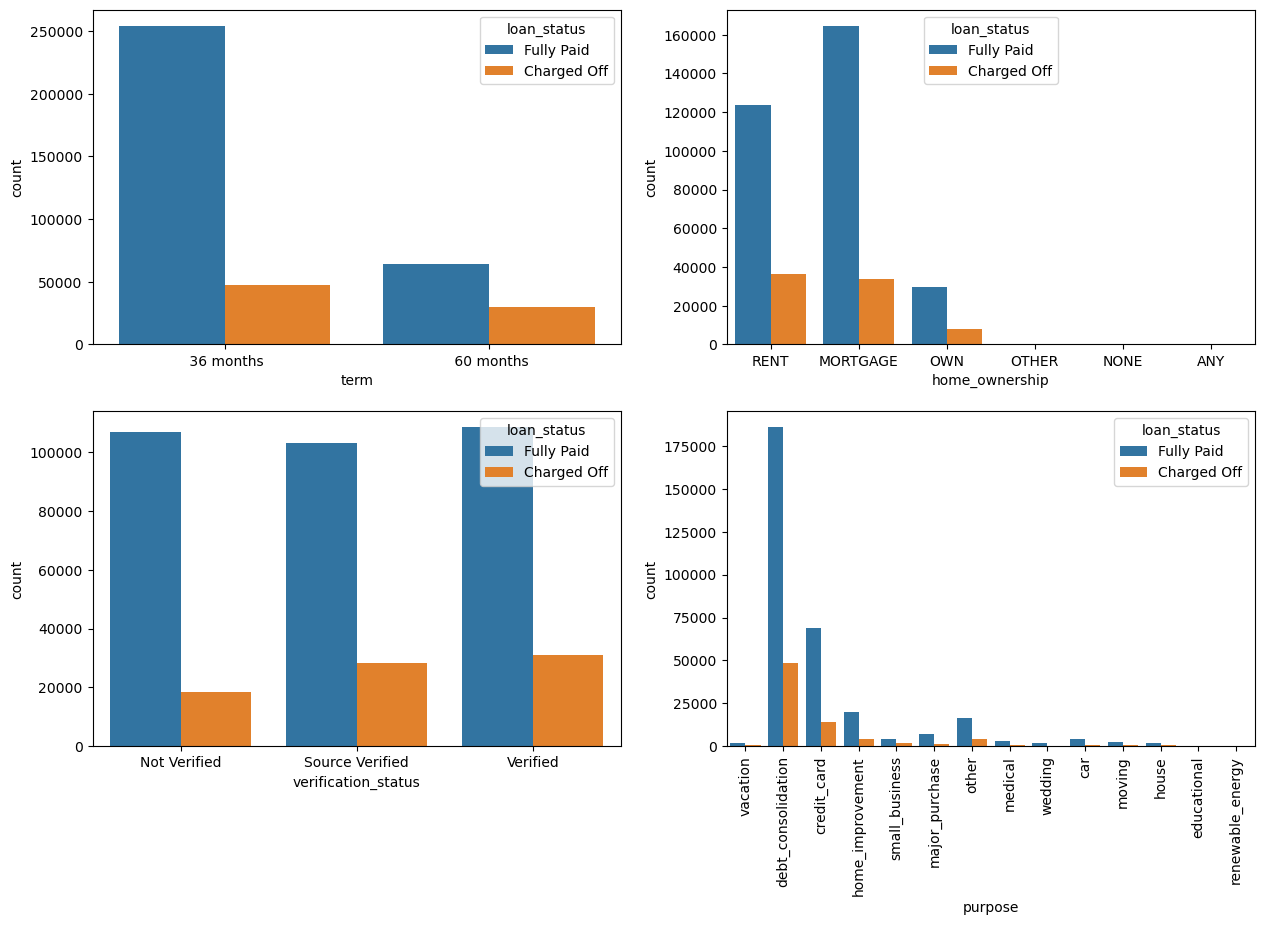

In [226]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

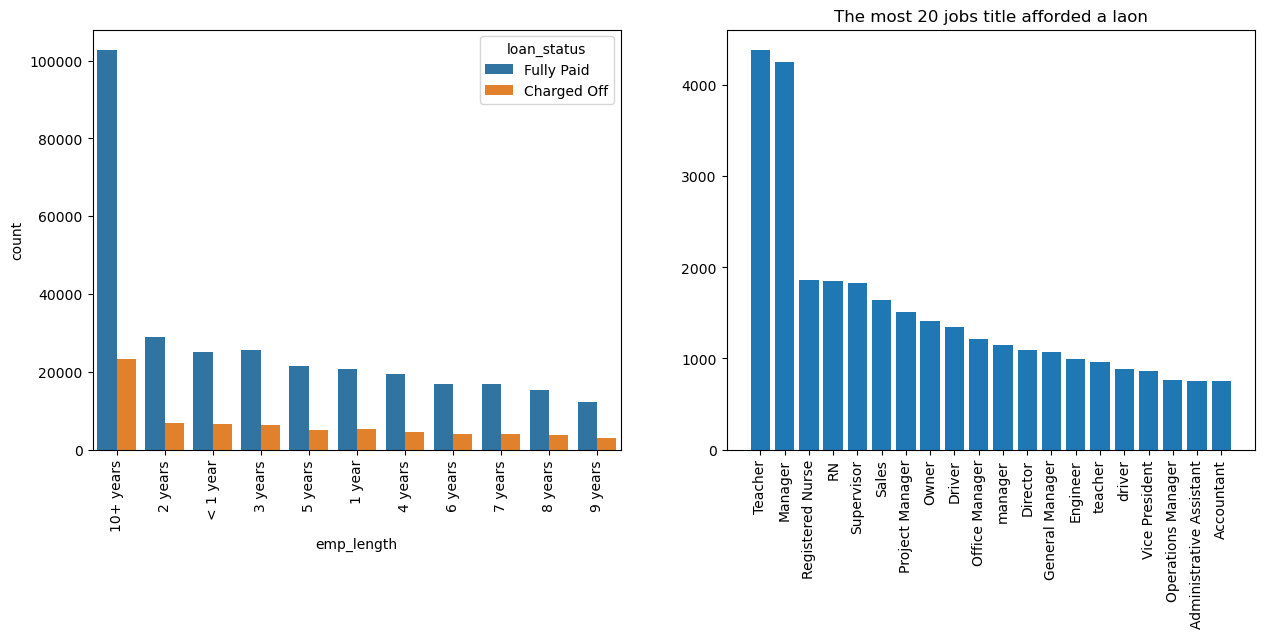

In [227]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = df["emp_length"].value_counts().index
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,2,2)
plt.bar(df['emp_title'].value_counts()[:20].index,df['emp_title'].value_counts()[:20])
plt.title("The most 20 jobs title afforded a laon")
# plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

In [228]:

def pub_rec(n):
    if n == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(n):
    if n == 0.0:
        return 0
    elif n >= 1.0:
        return 1
    else:
        return n
    
    
def pub_rec_bankruptcies(n):
    if n == 0.0:
        return 0
    elif n >= 1.0:
        return 1
    else:
        return n

In [229]:
df['pub_rec']=df['pub_rec'].apply(pub_rec)
df['mort_acc']=df['mort_acc'].apply(mort_acc)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

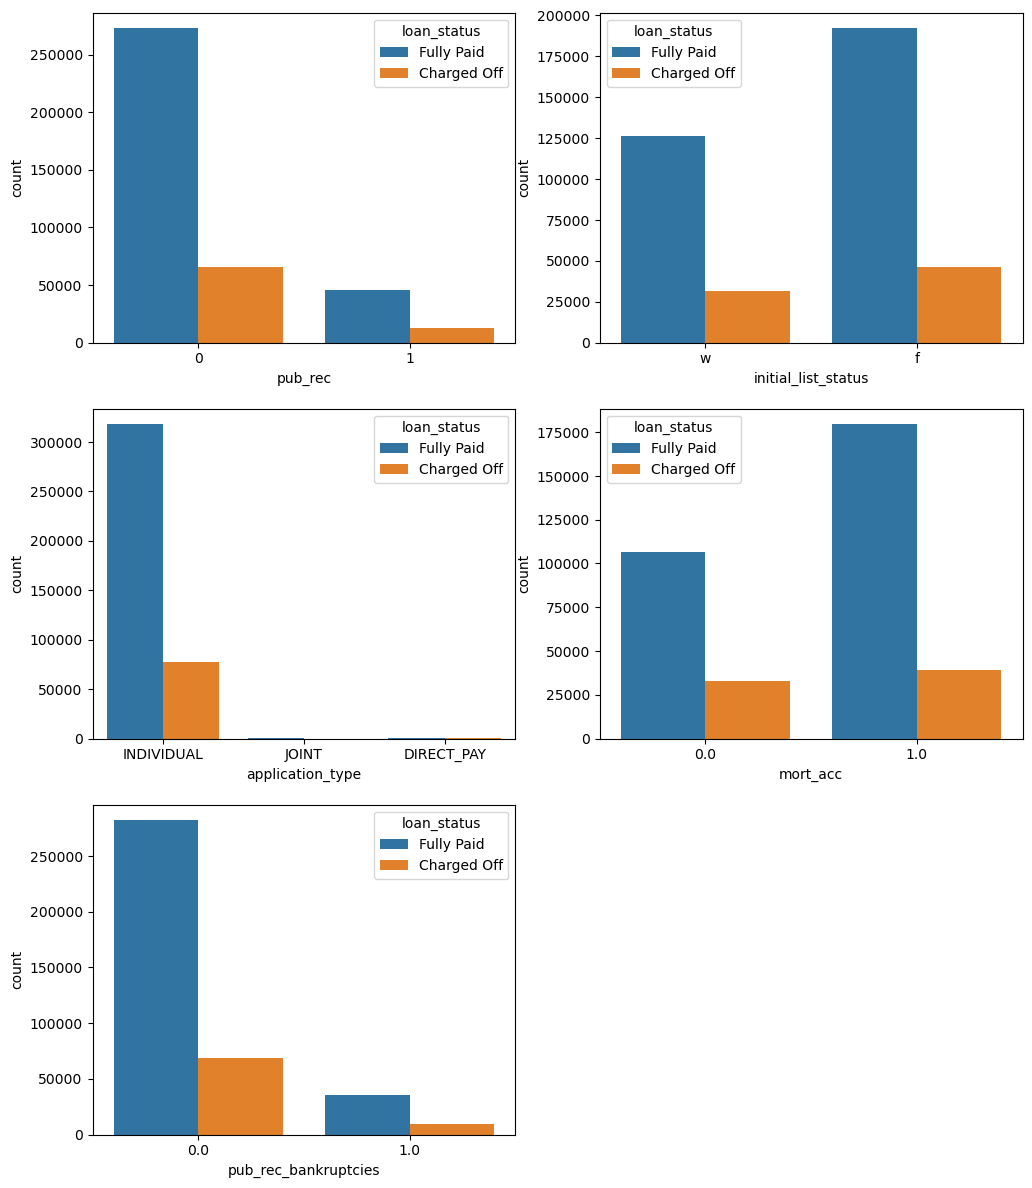

In [230]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=df,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

In [231]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,credit card refinance,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,2015-10-01,Fully Paid,debt_consolidation,debt consolidation,15.63,2004-11-01,6.0,0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,2015-02-01,Fully Paid,debt_consolidation,debt consolidation,21.45,2006-02-01,6.0,0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,2013-10-01,Fully Paid,debt_consolidation,pay off credit cards,17.56,1997-03-01,15.0,0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,2012-08-01,Fully Paid,debt_consolidation,loanforpayoff,15.88,1990-11-01,9.0,0,15704.0,53.8,20.0,f,INDIVIDUAL,1.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

In [233]:
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df['term'].map(term_values)

In [234]:
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df['initial_list_status'].map(list_status)

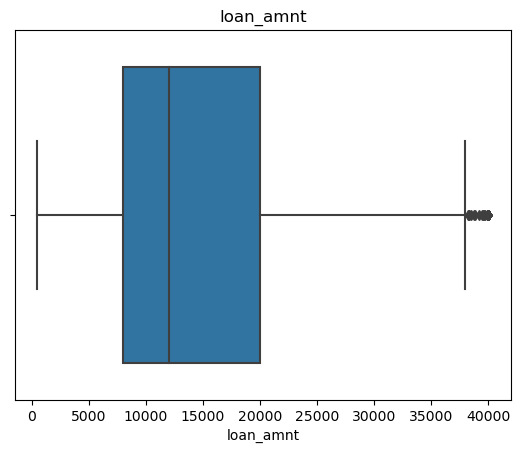

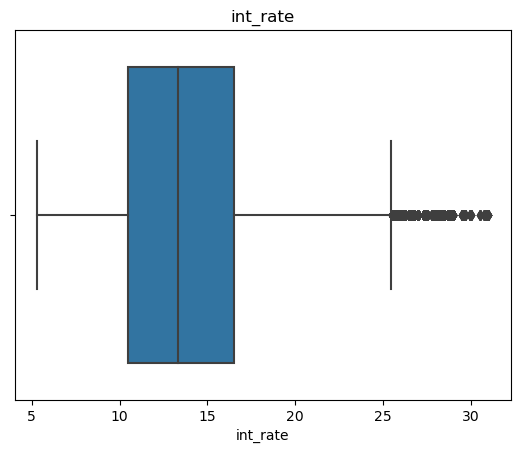

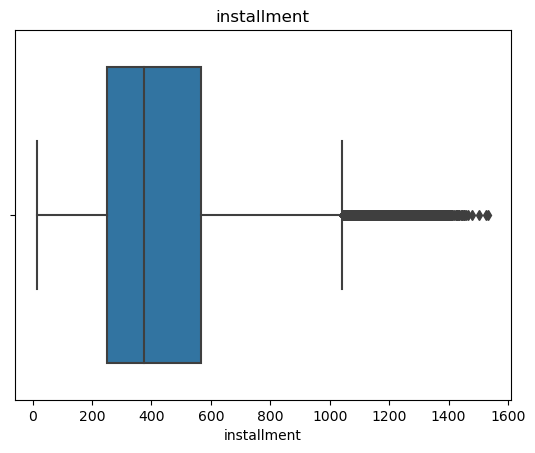

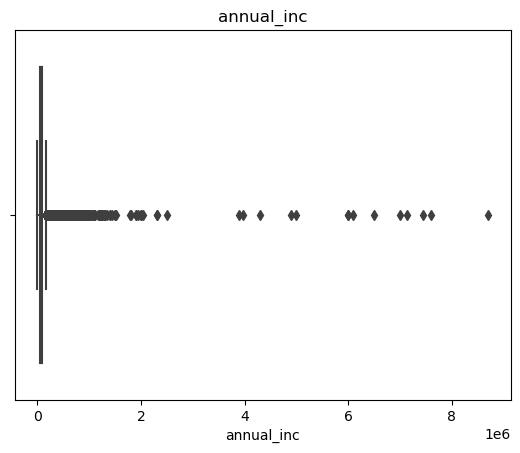

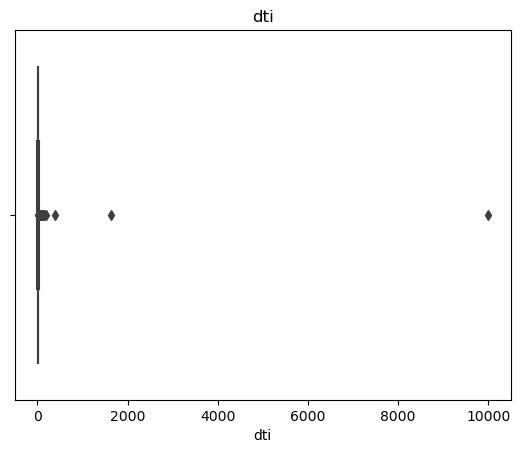

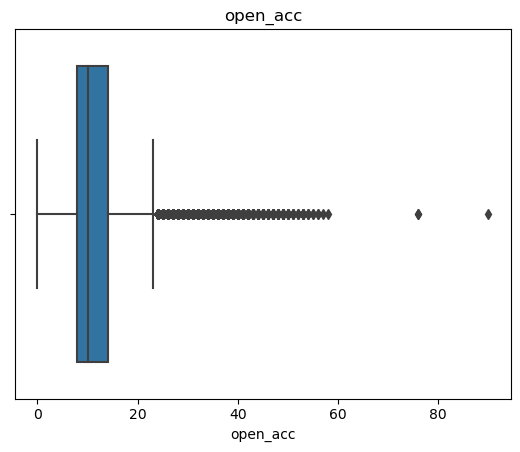

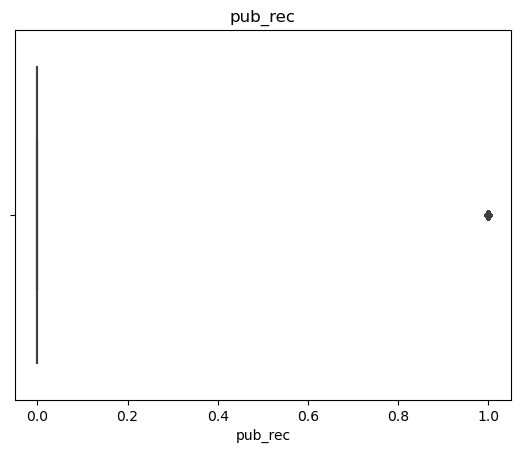

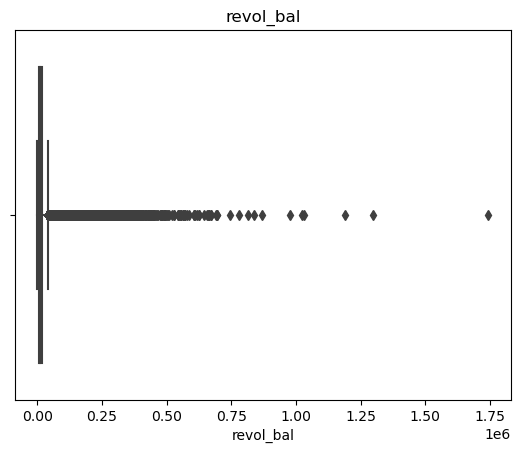

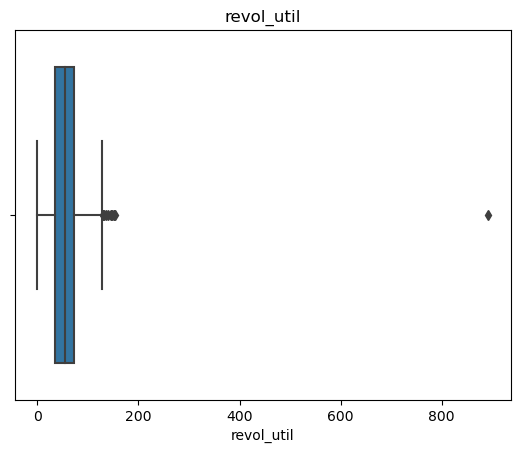

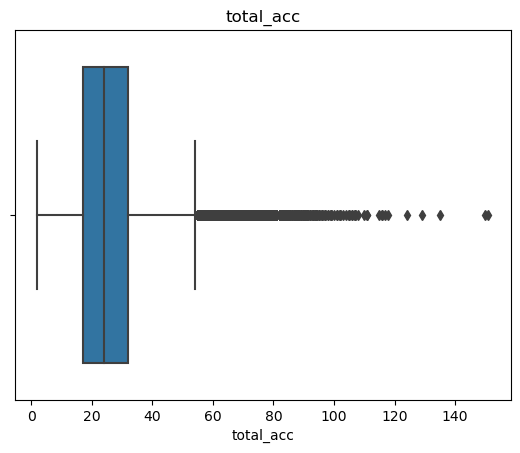

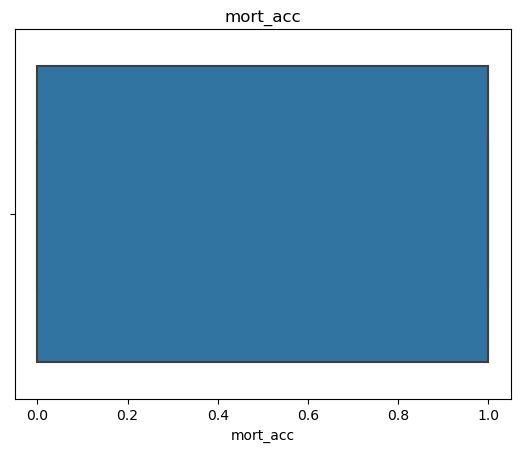

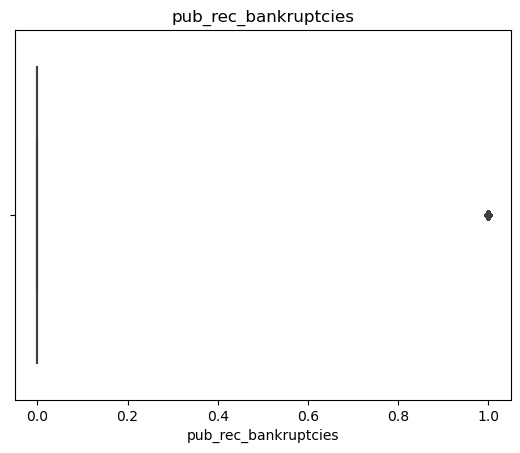

In [235]:
for i in numeric_column:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [236]:
numeric_column = ['loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc']
for col in numeric_column:
    mean=df[col].mean()
    std=df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

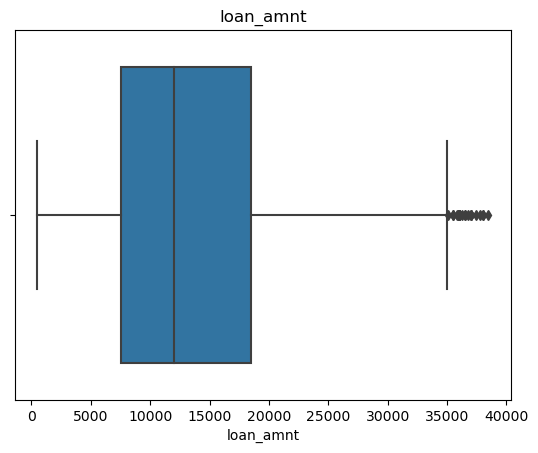

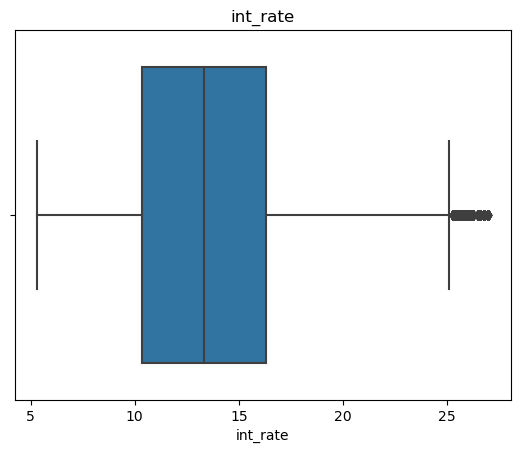

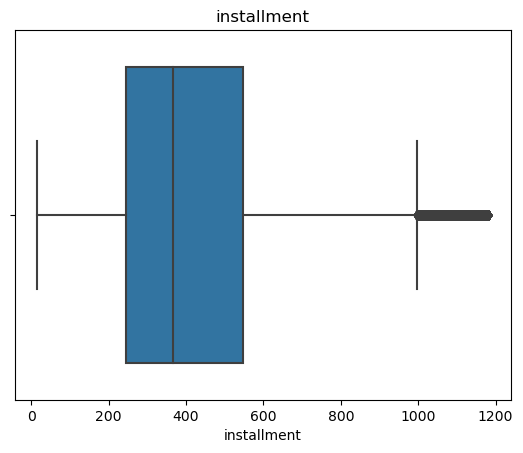

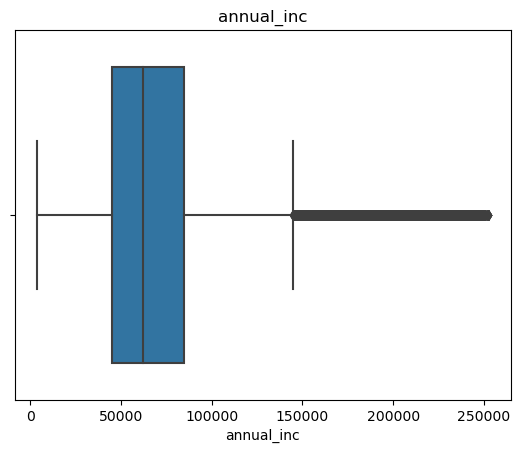

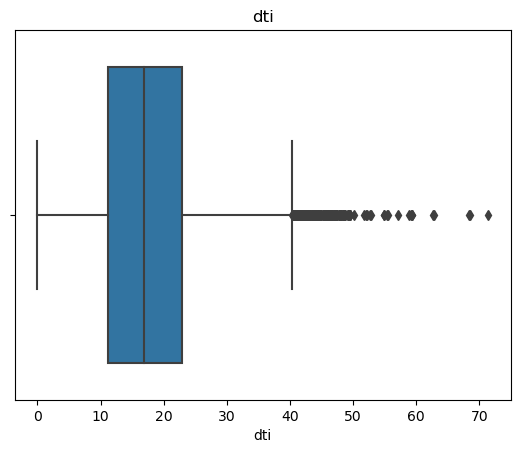

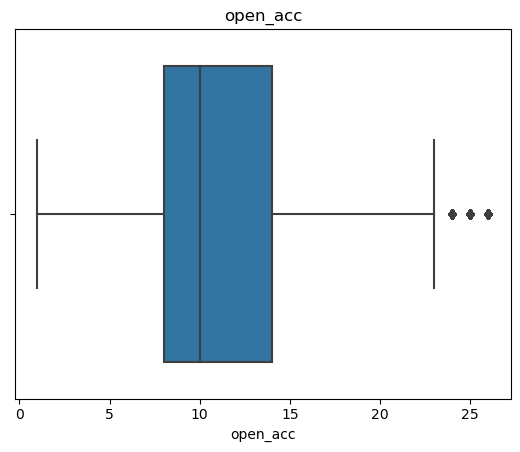

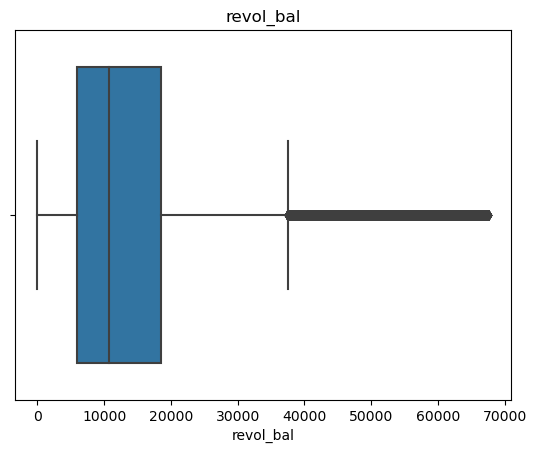

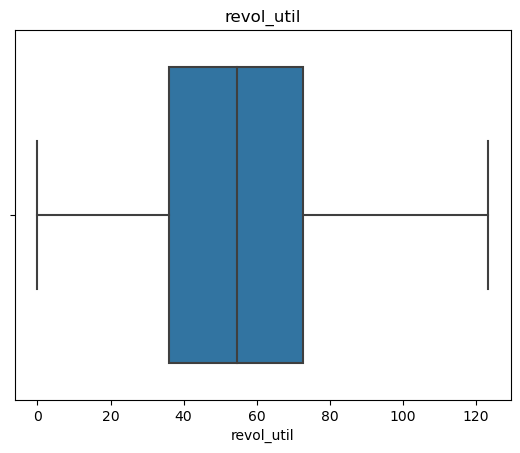

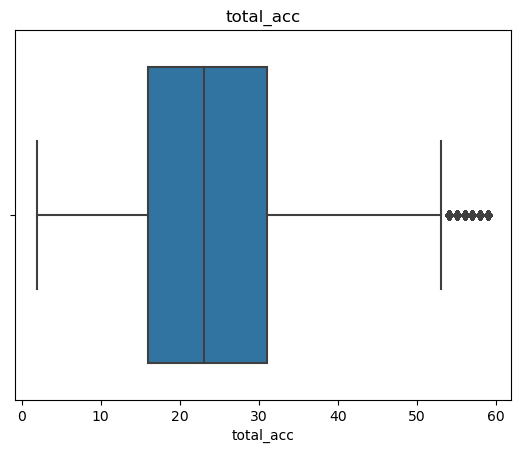

In [237]:
for i in numeric_column:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [238]:
df.shape

(374310, 27)

In [239]:
for col in numeric_column:
    mean=df[col].mean()
    std=df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

In [240]:
df.shape

(355291, 27)

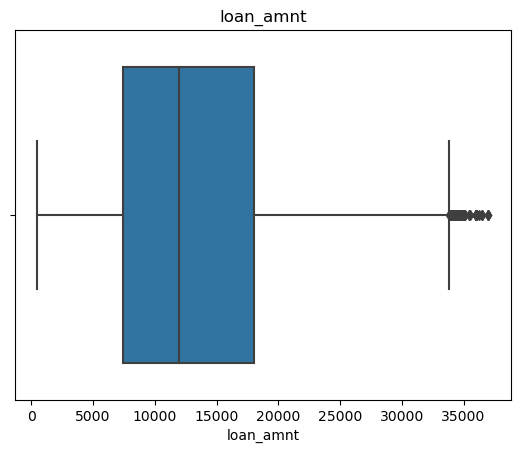

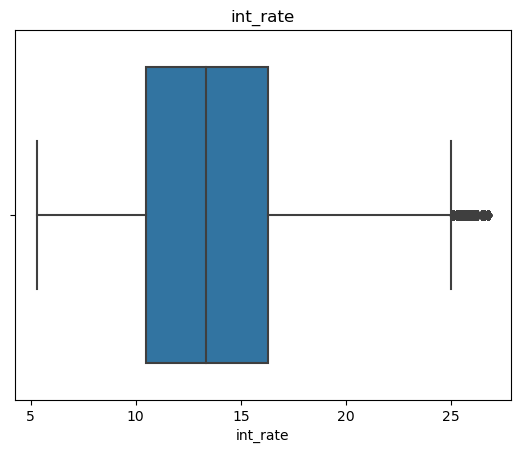

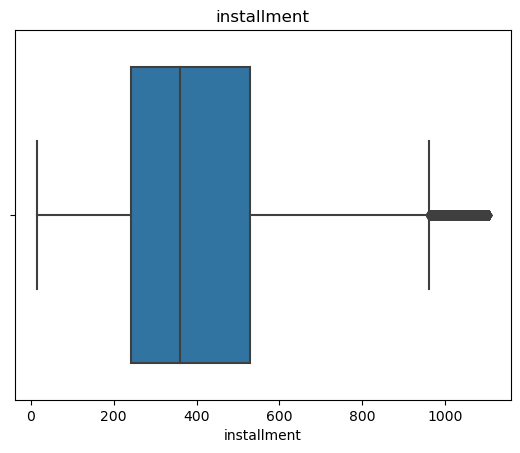

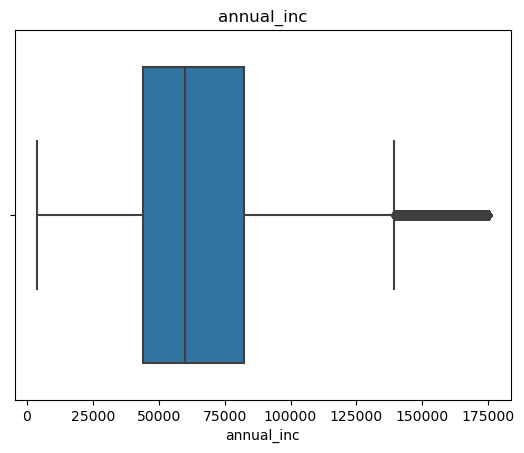

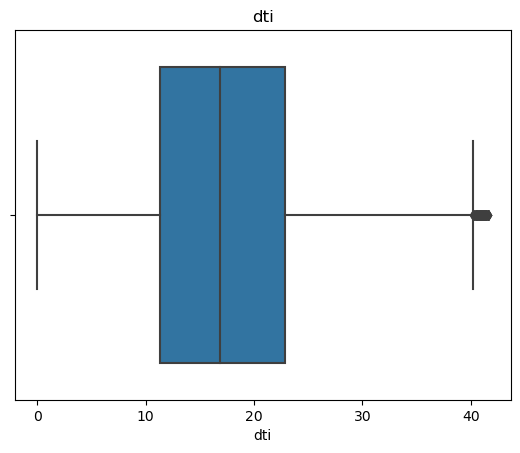

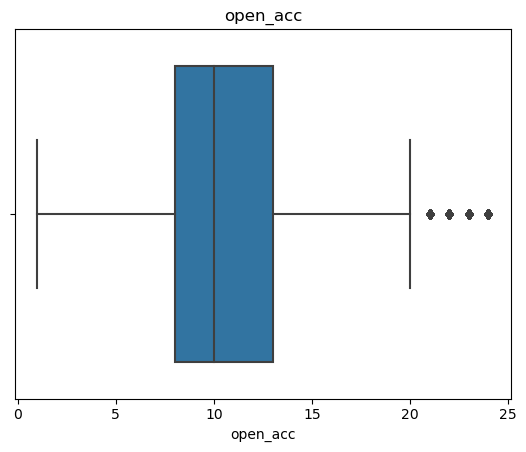

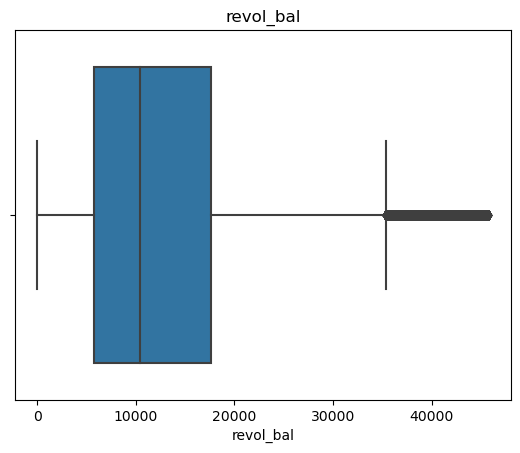

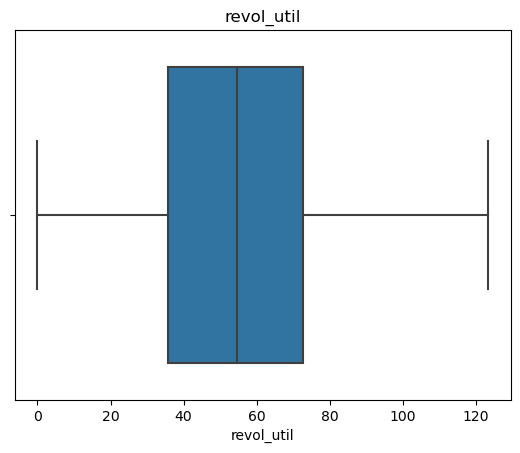

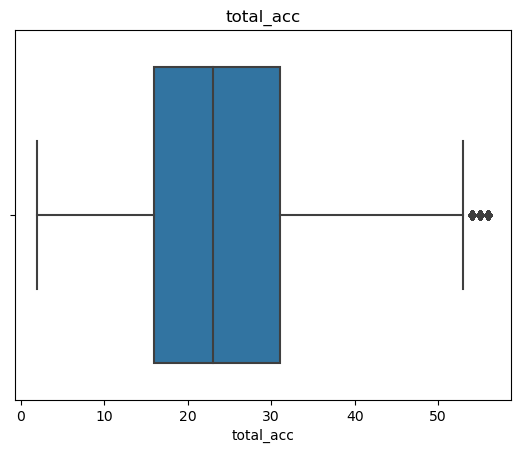

In [241]:
for i in numeric_column:
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [242]:
df.shape

(355291, 27)

In [243]:
(df.isna().sum()/df.shape[0])*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.912337
emp_length              4.832095
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.421908
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.867404
pub_rec_bankruptcies    0.136226
address                 0.000000
dtype: float64

In [244]:
df["mort_acc"].mean()

0.5869413833052809

In [249]:
df["mort_acc"] = df["mort_acc"].fillna(1)

In [250]:
(df.isna().sum()/df.shape[0])*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.912337
emp_length              4.832095
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.421908
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.136226
address                 0.000000
dtype: float64

In [252]:
df = df.dropna()

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332350 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             332350 non-null  float64       
 1   term                  332350 non-null  int64         
 2   int_rate              332350 non-null  float64       
 3   installment           332350 non-null  float64       
 4   grade                 332350 non-null  object        
 5   sub_grade             332350 non-null  object        
 6   emp_title             332350 non-null  object        
 7   emp_length            332350 non-null  object        
 8   home_ownership        332350 non-null  object        
 9   annual_inc            332350 non-null  float64       
 10  verification_status   332350 non-null  object        
 11  issue_d               332350 non-null  datetime64[ns]
 12  loan_status           332350 non-null  object        
 13 